In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
data1=pd.read_csv("main_data.csv")
data2=pd.read_csv("soil_analysis_data.csv")

In [3]:
print(data1.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   District                             1362 non-null   object 
 1   Crop                                 1362 non-null   object 
 2   Crop_Year                            1362 non-null   float64
 3   Season                               1362 non-null   object 
 4   Area                                 1362 non-null   float64
 5   Production                           1362 non-null   float64
 6   Yield                                1362 non-null   float64
 7   Irrigation Method                    1362 non-null   object 
 8   Water Consumption (liters/hectare)   1362 non-null   float64
 9   Water Availability (liters/hectare)  1362 non-null   float64
dtypes: float64(6), object(4)
memory usage: 106.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Rang

In [4]:
data2['District'] = data2['District'].str.lower()

In [5]:
df = data1.merge(data2, on='District', how='inner')
df

,District,Crop,Crop_Year,Season,Area,Production,Yield,Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare),Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
0,ajmer,Bajra,1997.0,Kharif,10.097942,7.084094,0.361256,Sprinkler Irrigation,11392.33063,10973.48962,Loamy,7.658727,1.833570,29.533066,17.353339,32.427648
1,ajmer,Bajra,1997.0,Kharif,10.097942,7.084094,0.361256,Sprinkler Irrigation,11392.33063,10973.48962,Loamy,7.680709,1.353429,32.861952,22.253017,30.650918
2,ajmer,Bajra,1997.0,Kharif,10.097942,7.084094,0.361256,Sprinkler Irrigation,11392.33063,10973.48962,Sandy,7.258219,1.693917,32.456038,18.209853,39.303014
3,ajmer,Bajra,1997.0,Kharif,10.097942,7.084094,0.361256,Sprinkler Irrigation,11392.33063,10973.48962,Nitrogenous,7.923385,0.936386,29.504528,16.985897,42.161315
4,ajmer,Bajra,1997.0,Kharif,10.097942,7.084094,0.361256,Sprinkler Irrigation,11392.33063,10973.48962,Chalky (Calcareous),7.161502,1.613670,34.150959,24.501993,42.256127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123646,udaipur,Wheat,2019.0,Rabi,10.424243,8.243475,0.825231,Drip Irrigation,10324.88693,10007.61010,Clay,7.666360,1.333426,28.763320,21.666153,46.495749
123647,udaipur,Wheat,2019.0,Rabi,10.424243,8.243475,0.825231,Drip Irrigation,10324.88693,10007.61010,Chalky (Calcareous),7.095055,2.709518,31.466760,23.649097,46.959604
123648,udaipur,Wheat,2019.0,Rabi,10.424243,8.243475,0.825231,Drip Irrigation,10324.88693,10007.61010,Alkaline,7.801237,2.520029,24.905650,18.861145,35.299920
123649,udaipur,Wheat,2019.0,Rabi,10.424243,8.243475,0.825231,Drip Irrigation,10324.88693,10007.61010,Loamy,7.403195,2.372293,33.209736,18.648662,41.088591


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123651 entries, 0 to 123650
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   District                             123651 non-null  object 
 1   Crop                                 123651 non-null  object 
 2   Crop_Year                            123651 non-null  float64
 3   Season                               123651 non-null  object 
 4   Area                                 123651 non-null  float64
 5   Production                           123651 non-null  float64
 6   Yield                                123651 non-null  float64
 7   Irrigation Method                    123651 non-null  object 
 8   Water Consumption (liters/hectare)   123651 non-null  float64
 9   Water Availability (liters/hectare)  123651 non-null  float64
 10  Soil Type                            123651 non-null  object 
 11  pH Level     

In [7]:
df['Crop'].value_counts()

Barley    20861
Wheat     20861
Bajra     20644
Jowar     20606
Onion     20371
Maize     20308
Name: Crop, dtype: int64

In [8]:
df.describe()

,Crop_Year,Area,Production,Yield,Water Consumption (liters/hectare),Water Availability (liters/hectare),pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
count,123651.000000,123651.000000,123651.000000,123651.000000,123651.000000,123651.000000,123651.000000,123651.000000,123651.000000,123651.000000,123651.000000
mean,2008.043914,8.320236,6.467088,0.637368,10717.897242,10805.208209,7.493402,1.991782,29.908239,19.768826,39.929073
std,6.615844,2.721775,1.850124,0.232770,2802.304646,2918.905547,0.521194,0.512041,5.204451,5.114362,4.845922
min,1997.000000,0.689579,0.651777,0.000000,5216.115117,5076.985744,5.889492,0.155817,11.994574,4.961838,25.838370
25%,2002.000000,7.197737,5.518477,0.488236,8293.472954,8133.959009,7.148145,1.635961,26.221042,16.220246,36.713137
50%,2008.000000,8.999516,6.911987,0.682494,10593.992070,10969.827630,7.501116,1.977036,29.827247,20.003414,39.888605
75%,2014.000000,10.293933,7.897165,0.800646,12647.303410,13088.406040,7.853039,2.346385,33.220619,23.272155,43.434783
max,2019.000000,12.205722,9.038658,1.100350,17436.658860,17866.023900,9.038430,3.764528,45.760284,34.677031,54.678290


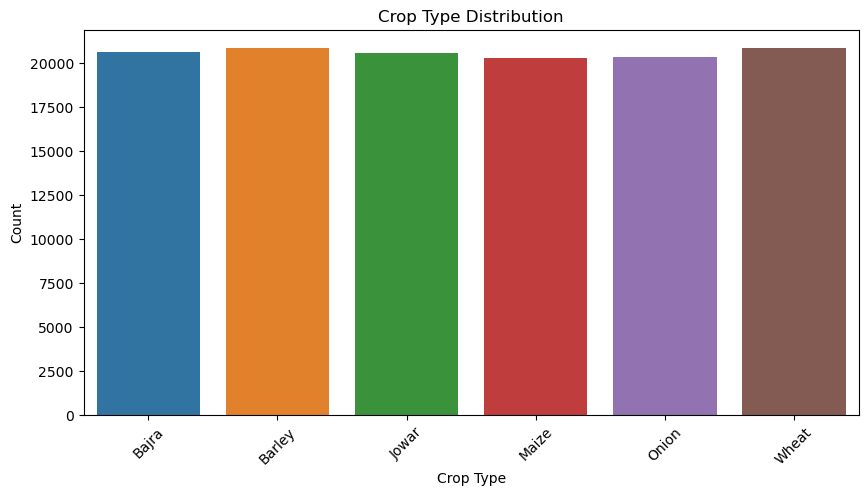

In [9]:
#Visualize the counts of different crop types.
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Crop')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.title('Crop Type Distribution')
plt.xticks(rotation=45)
plt.show()

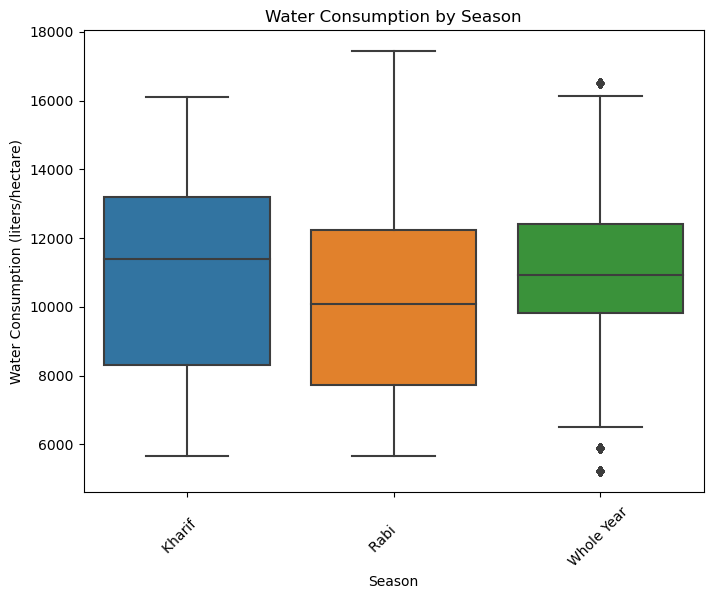

In [10]:
#Explore how water consumption varies across different seasons.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Season', y='Water Consumption (liters/hectare)')
plt.xlabel('Season')
plt.ylabel('Water Consumption (liters/hectare)')
plt.title('Water Consumption by Season')
plt.xticks(rotation=45)
plt.show()

C:\Users\Brinil john\AppData\Local\Temp\ipykernel_2548\967756552.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


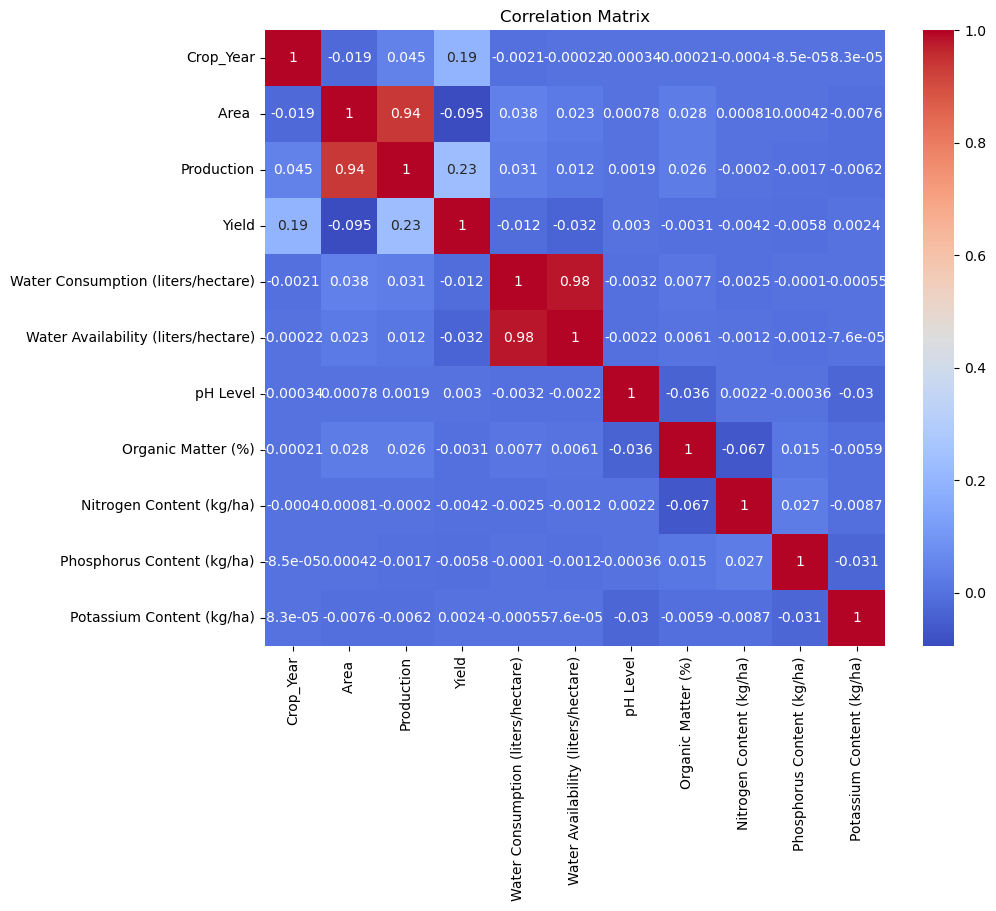

In [11]:
#Visualize the correlation between numerical variables.
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# (nominal)
df = pd.get_dummies(df, columns=['District','Crop', 'Irrigation Method', 'Soil Type'])

# (ordinal)
df['Season'] = df['Season'].str.strip()
season_mapping = {'Kharif': 1, 'Rabi': 2, 'Whole Year': 3}
df['Season'] = df['Season'].map(season_mapping)
df

,Crop_Year,Season,Area,Production,Yield,Water Consumption (liters/hectare),Water Availability (liters/hectare),pH Level,Organic Matter (%),Nitrogen Content (kg/ha),...,Irrigation Method_Sprinkler Irrigation,Irrigation Method_Tube Well,Soil Type_Alkaline,Soil Type_Black lava soil,Soil Type_Chalky (Calcareous),Soil Type_Clay,Soil Type_Loamy,Soil Type_Nitrogenous,Soil Type_Saline,Soil Type_Sandy
0,1997.0,1,10.097942,7.084094,0.361256,11392.33063,10973.48962,7.658727,1.833570,29.533066,...,1,0,0,0,0,0,1,0,0,0
1,1997.0,1,10.097942,7.084094,0.361256,11392.33063,10973.48962,7.680709,1.353429,32.861952,...,1,0,0,0,0,0,1,0,0,0
2,1997.0,1,10.097942,7.084094,0.361256,11392.33063,10973.48962,7.258219,1.693917,32.456038,...,1,0,0,0,0,0,0,0,0,1
3,1997.0,1,10.097942,7.084094,0.361256,11392.33063,10973.48962,7.923385,0.936386,29.504528,...,1,0,0,0,0,0,0,1,0,0
4,1997.0,1,10.097942,7.084094,0.361256,11392.33063,10973.48962,7.161502,1.613670,34.150959,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123646,2019.0,2,10.424243,8.243475,0.825231,10324.88693,10007.61010,7.666360,1.333426,28.763320,...,0,0,0,0,0,1,0,0,0,0
123647,2019.0,2,10.424243,8.243475,0.825231,10324.88693,10007.61010,7.095055,2.709518,31.466760,...,0,0,0,0,1,0,0,0,0,0
123648,2019.0,2,10.424243,8.243475,0.825231,10324.88693,10007.61010,7.801237,2.520029,24.905650,...,0,0,1,0,0,0,0,0,0,0
123649,2019.0,2,10.424243,8.243475,0.825231,10324.88693,10007.61010,7.403195,2.372293,33.209736,...,0,0,0,0,0,0,1,0,0,0


### Separate the data into features (X) and the target variable (Y):

In [13]:
X = df.drop('Yield', axis=1)
y = df['Yield']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### PCA - Principal Component Analysis

In [14]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [15]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.06972609 0.0596812  0.05587213 0.04096904 0.03998797 0.03646015
 0.03472113 0.03424405 0.03292117 0.03238205 0.03195915 0.03129399
 0.03103586 0.03062061 0.03045123 0.02994369 0.02967208 0.02912964
 0.02823484 0.0279067  0.02687245 0.02662665 0.02637699 0.02611212
 0.02548558 0.02484339 0.02332672 0.02267891 0.02244238]


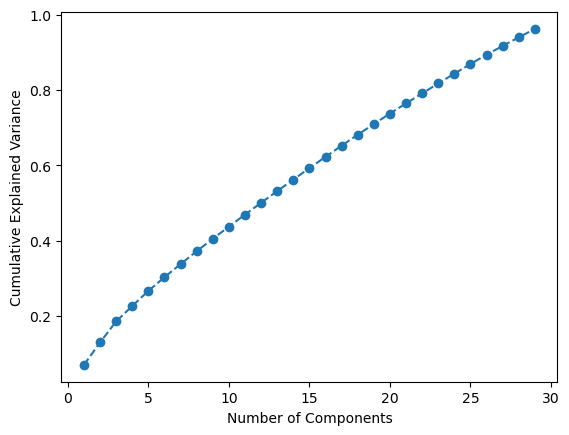

In [16]:
cumulative_variance = explained_variance.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [17]:
pca = PCA(n_components=29)
X_pca = pca.fit_transform(X_scaled)

### ANN-MLR Hybrid Model

In [18]:
X = X_pca
Y = df['Yield']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
# Build and train the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=30, batch_size=352)

Epoch 1/30
282/282 [==============================] - 1s 2ms/step - loss: 0.0859
Epoch 2/30
282/282 [==============================] - 1s 2ms/step - loss: 0.0190
Epoch 3/30
282/282 [==============================] - 1s 2ms/step - loss: 0.0143
Epoch 4/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0121
Epoch 5/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0106
Epoch 6/30
282/282 [==============================] - 1s 2ms/step - loss: 0.0094
Epoch 7/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0085
Epoch 8/30
282/282 [==============================] - 1s 2ms/step - loss: 0.0078
Epoch 9/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0071
Epoch 10/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0065
Epoch 11/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0060
Epoch 12/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 13/30
282/282 [====

In [36]:
# Use the trained ANN to make predictions
ann_predictions = model.predict(X_test)

773/773 [==============================] - 2s 2ms/step


In [37]:
# Convert ann_predictions to a DataFrame
ann_df = pd.DataFrame({'Ann_Predictions': ann_predictions[:, 0]})

# Concatenate the DataFrames
mlr_input = pd.concat([pd.DataFrame(X_test), ann_df], axis=1)
mlr_input= mlr_input.rename(str,axis="columns")
# Initialize and fit the MLR model
mlr_model = LinearRegression()
mlr_model.fit(mlr_input, Y_test)

LinearRegression()

In [38]:
mlr_ann_input = np.concatenate((X_test, ann_predictions), axis=1)

# Make predictions using the hybrid model
hybrid_predictions = mlr_model.predict(mlr_ann_input)

d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
# Calculate R-squared (R^2)
r2 = r2_score(Y_test, hybrid_predictions)
print(f'R-squared (R^2): {r2}')

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(Y_test, hybrid_predictions))
print(f'Root Mean Square Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, hybrid_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R^2): 0.9909159820548245
Root Mean Square Error (RMSE): 0.022219956975534468
Mean Absolute Error (MAE): 0.014840939603988584


C:\Users\Brinil john\AppData\Local\Temp\ipykernel_2548\2144046717.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_test, hist=False, color="red", label="Actual Value")
C:\Users\Brinil john\AppData\Local\Temp\ipykernel_2548\2144046717.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

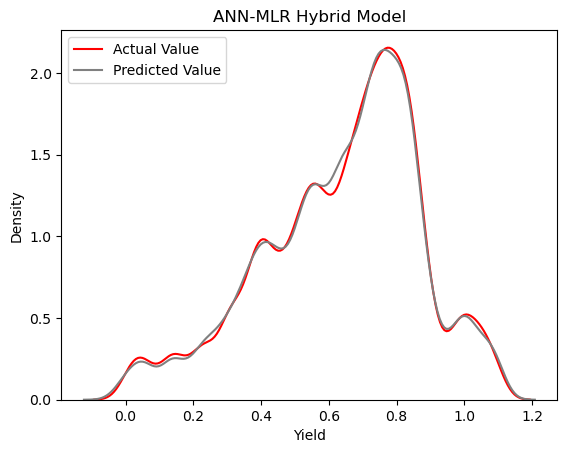

In [40]:
ax = sns.distplot(Y_test, hist=False, color="red", label="Actual Value")
sns.distplot(hybrid_predictions, hist=False, color="grey", label="Predicted Value", ax=ax)

# Add legend
plt.legend()

plt.title('ANN-MLR Hybrid Model')
plt.show()

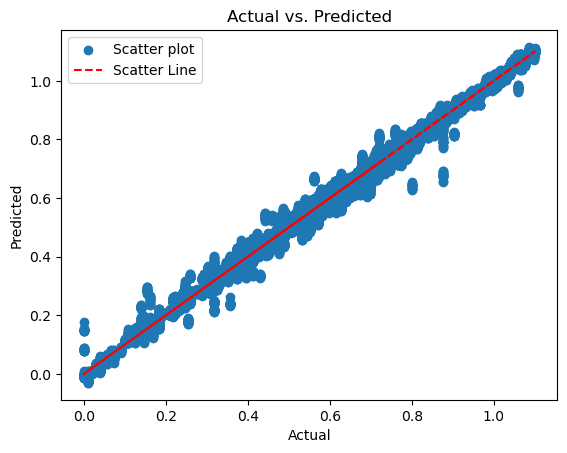

In [41]:
plt.scatter(Y_test, hybrid_predictions, label='Scatter plot')
plt.plot(Y_test, Y_test, label='Scatter Line', color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()  # Add a legend to distinguish between the scatter plot and scatter line
plt.show()

### Random Forest

In [43]:
x1 = X_pca
y1 = df["Yield"]

x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2, random_state=42)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (98920, 29)
x_test : (24731, 29)
y_train : (98920,)
y_test : (24731,)


In [45]:
model = RandomForestRegressor(n_estimators = 19,criterion='squared_error')
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([0.50539593, 0.83807455, 0.77785614, ..., 0.52120516, 0.84287743,
       0.77036481])

In [46]:
model.score(x_test,y_test)

0.9685096328870404

In [47]:
# Calculate R-squared (R2)
r2 = r2_score(y_test, rf_predict)
print(f"R-squared (R2): {r2}")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, rf_predict))
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, rf_predict)
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R2): 0.9685096328870404
Root Mean Squared Error (RMSE): 0.041370720429596664
Mean Absolute Error (MAE): 0.02472671827502879


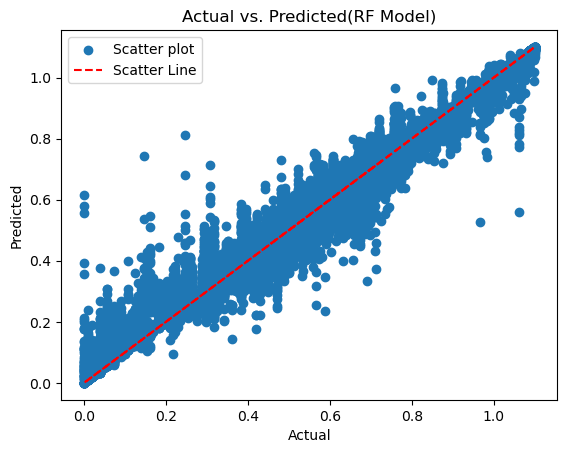

In [48]:
plt.scatter(y_test,rf_predict, label='Scatter plot')
plt.plot(y_test, y_test, label='Scatter Line', color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted(RF Model)')
plt.legend()  # Add a legend to distinguish between the scatter plot and scatter line
plt.show()

C:\Users\Brinil john\AppData\Local\Temp\ipykernel_2548\3073031263.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="red", label="Actual Value")
C:\Users\Brinil john\AppData\Local\Temp\ipykernel_2548\3073031263.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

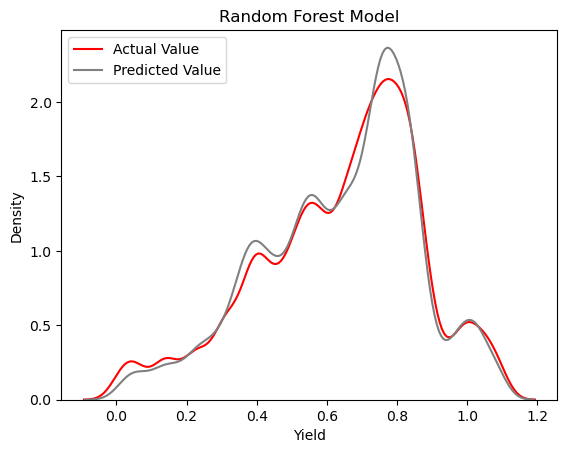

In [49]:
ax = sns.distplot(y_test, hist=False, color="red", label="Actual Value")
sns.distplot(rf_predict, hist=False, color="grey", label="Predicted Value", ax=ax)

# Add legend
plt.legend()

plt.title('Random Forest Model')
plt.show()